![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Sea Level Predictor

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [3]:
df = pd.read_csv('C:/Users/catte/Dropbox/Tech Learning/GitHub/FreeCodeCamp/FCC_8/finalStudies/sea_level_predictor/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [14]:
def draw_plot():
    # Read data from file & rename
    df = pd.read_csv('C:/Users/catte/Dropbox/Tech Learning/GitHub/FreeCodeCamp/FCC_8/finalStudies/sea_level_predictor/epa-sea-level.csv').rename(columns={"Year": "year", "CSIRO Adjusted Sea Level": "sea",})
    
    # Create scatter plot
    # Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
    plt.figure(figsize=(12,4), dpi=100)
    #sns.scatterplot(x="Year", y="CSIRO Adjusted Sea Level", data=sea_data)
    plt.scatter(df["year"], df["sea"])

    # Create first line of best fit
    # Expand the data to go to 2050 using historical data
    regressA = linregress(df["year"], df["sea"])
    xA = np.arange(df["year"].min(), 2050, 1)
    yA = xA * regressA.slope + regressA.intercept
    plt.plot(xA,yA)
    

    # Create second line of best fit
    df_2000 = df[df["year"] >= 2000]

    regressB = linregress(df_2000["year"], df_2000["sea"])
    xB = np.arange(2000, 2050, 1)
    yB = xB * regressB.slope + regressB.intercept
    plt.plot(xB,yB)


    # Add labels and title
    #The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
    plt.xlabel("Year")
    plt.ylabel("Sea Level (in)")
    plt.title("Rise in Sea Level")
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()


<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

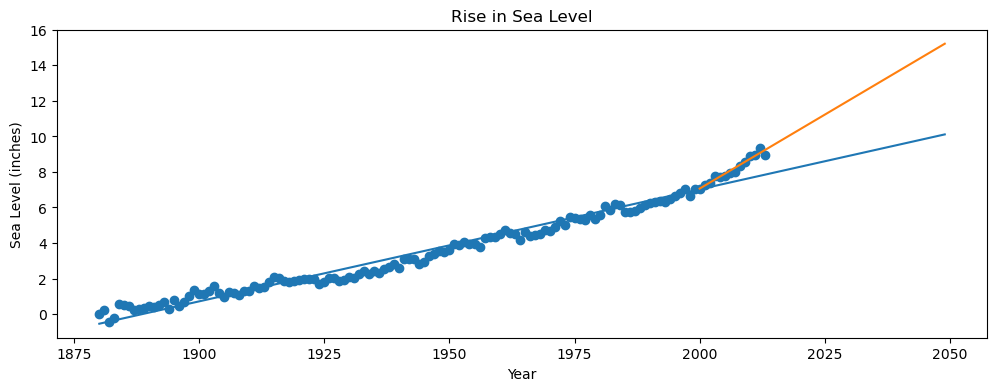

In [15]:
draw_plot()